<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/goldenrod).*


<!--NAVIGATION-->
< [Spot-check Everest Validation Summaries for KEGS](01.06-Everest_KEGS_DVS.ipynb) | [Contents](Index.ipynb) | [Supernova Searches](02.00-Supernova_searches.ipynb) >

# Exploratory analysis of K2 transient light curves

In this notebook we examine a *known* transient event captured by K2.

Overview:

1. Retrieve data from MAST
2. Look at the lightcurve
3. Look at the TPF
4. Compare to EVEREST

In [3]:
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from astropy.io import fits
import ipywidgets as widgets
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Retrieve data from MAST

Here is a known transient:  
[EPIC 212593538 interactive on MAST](https://archive.stsci.edu/canvas/k2hlsp_plot.html?k2=212593538&c=6&type=LC)  
[EPIC 212593538 links to lightcurves and TPF](https://archive.stsci.edu/k2/preview.php?dsn=KTWO212593538-C06&type=LC)



Save and download the files linked above to `../data`.  Let's look at the lightcurve first.

In [11]:
hdu = fits.open('/Users/ryanr/Documents/PhD/coding/Kepler/K2/ktwo220359450-c08_lpd-targ.fits.gz')

In [12]:
hdu.info()

Filename: /Users/ryanr/Documents/PhD/coding/Kepler/Data/SN/Gaia16acr/ktwo220654018-c08_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   3853R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (11, 10)   int32   


Examine the aperture.

In [13]:
hdu_ap = hdu['APERTURE']

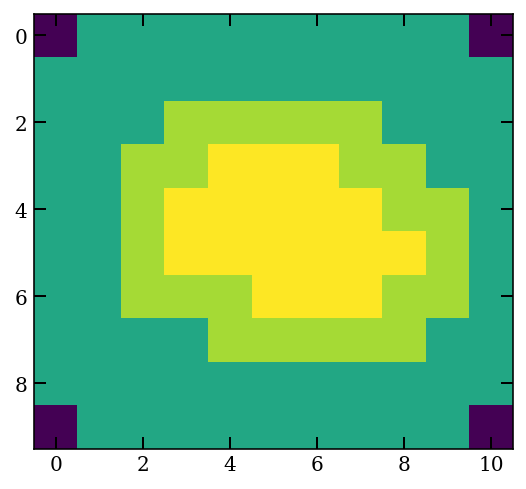

In [14]:
plt.imshow(hdu_ap.data)

In [15]:
dat = hdu['LIGHTCURVE'].data

In [16]:
dat.shape

(3853,)

In [17]:
len(dat[0])

20

In [18]:
dat.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'SAP_FLUX',
 'SAP_FLUX_ERR',
 'SAP_BKG',
 'SAP_BKG_ERR',
 'PDCSAP_FLUX',
 'PDCSAP_FLUX_ERR',
 'SAP_QUALITY',
 'PSF_CENTR1',
 'PSF_CENTR1_ERR',
 'PSF_CENTR2',
 'PSF_CENTR2_ERR',
 'MOM_CENTR1',
 'MOM_CENTR1_ERR',
 'MOM_CENTR2',
 'MOM_CENTR2_ERR',
 'POS_CORR1',
 'POS_CORR2']

In [19]:
dat['TIME']

array([ 2559.06854172,  2559.08897402,  2559.10940631, ...,  2637.73068388,
        2637.75111575,  2637.77154752])

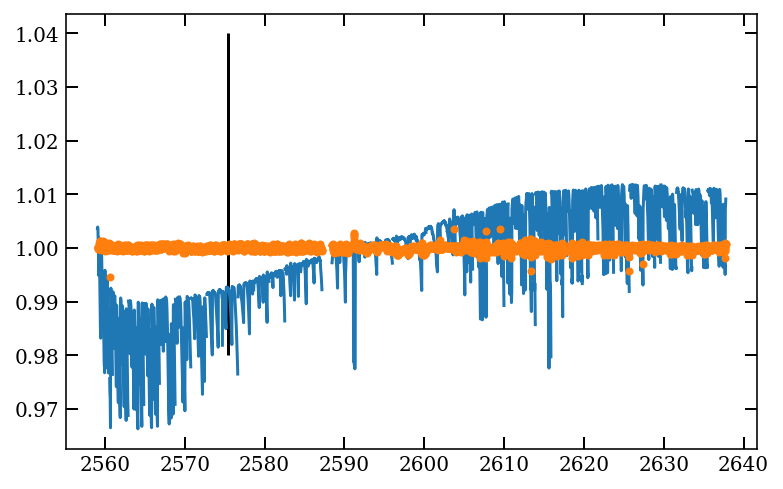

In [20]:
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']))
plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.')
plt.vlines(dat['TIME'][800], 0.98, 1.04)
#plt.ylim(0.98, 1.04)
#plt.xlim(2390, 2420)

PDC might not be useful for Supernova signals, even though it mitigates some instrumental artifacts.

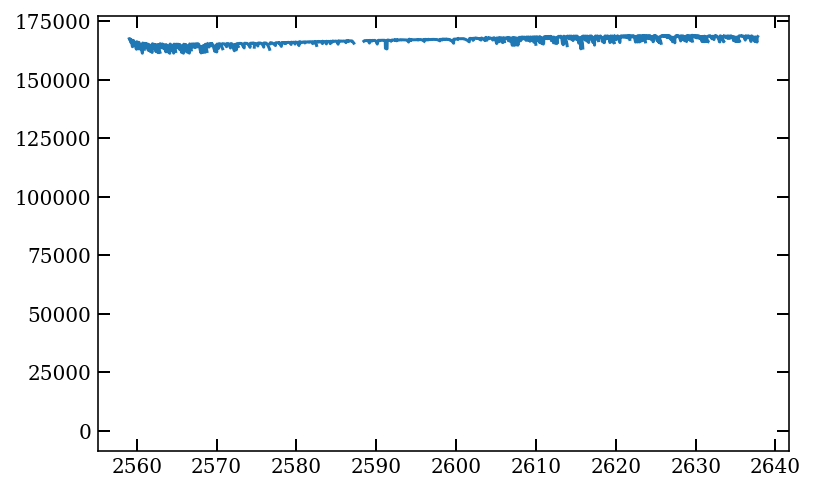

In [21]:
plt.plot(dat['TIME'], dat['SAP_FLUX'])
#plt.plot(dat['TIME'], dat['']/np.nanmedian(dat['PDCSAP_FLUX']))
plt.vlines(dat['TIME'][800], 0.98, 1.04)
#plt.ylim(0.98, 1.04)
#plt.xlim(2390, 2420)

### What does the target pixel file look like?

Also downloaded from the link above.

In [78]:
hdu2 = fits.open('/Users/ryanr/Documents/PhD/coding/Kepler/K2/ktwo220359450-c08_lpd-targ.fits.gz')

In [79]:
hdu2.info()

Filename: /Users/ryanr/Documents/PhD/coding/Kepler/K2/ktwo220359450-c08_lpd-targ.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  TARGETTABLES    1 BinTableHDU    282   3853R x 13C   [D, E, J, 42J, 42E, 42E, 42E, 42E, 42E, J, E, E, 0E]   
  2  APERTURE      1 ImageHDU        48   (7, 6)   int32   


In [80]:
dat2 = hdu2[1].data

In [81]:
dat2.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'RAW_CNTS',
 'FLUX',
 'FLUX_ERR',
 'FLUX_BKG',
 'FLUX_BKG_ERR',
 'COSMIC_RAYS',
 'QUALITY',
 'POS_CORR1',
 'POS_CORR2',
 'RB_LEVEL']

In [82]:
dat2['TIME']

array([ 2559.0684453 ,  2559.08887754,  2559.10930978, ...,  2637.73052419,
        2637.75095609,  2637.77138789])

In [83]:
dat2['FLUX'].shape

(3853, 6, 7)

In [84]:
frame300 = dat2['FLUX'][300, :,:]

In [85]:
frame300.shape

(6, 7)

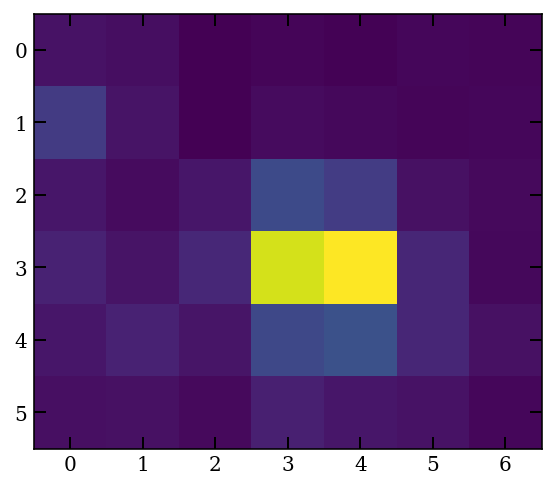

In [86]:
plt.imshow(frame300);

Can we animate it?

In [87]:
from ipywidgets import interact
from ipywidgets import interact, interactive, fixed, interact_manual

In [88]:
def plttpf(f):
    plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', alpha=0.3)
    plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.', alpha=0.3)
    plt.ylim(0.95, 1.02)
    #plt.xlim(2390, 2420)
    plt.axvline(dat['TIME'][f],color='k')
    plt.show()
    plt.imshow(dat2['FLUX'][f, :,:]-dat2['FLUX'][900, :,:],vmin=0,vmax=60)
    plt.show()

In [90]:
interact(plttpf, f=(0,2000,1));

interactive(children=(IntSlider(value=1000, description='f', max=2000), Output()), _dom_classes=('widget-interact',))

## Spot-check the EVEREST lightcurve of this known transient

In [39]:
import everest

In [44]:
star = everest.Everest(220654018)

INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 220654018.


In [45]:
star.dvs()

INFO  [everest.user.DownloadFile()]: Downloading the file...


INFO  [everest.user.plot()]: Plotting the light curve...


/Users/ryanr/anaconda3/lib/python3.5/site-packages/everest/user.py:628: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/Users/ryanr/anaconda3/lib/python3.5/site-packages/everest/user.py:644: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


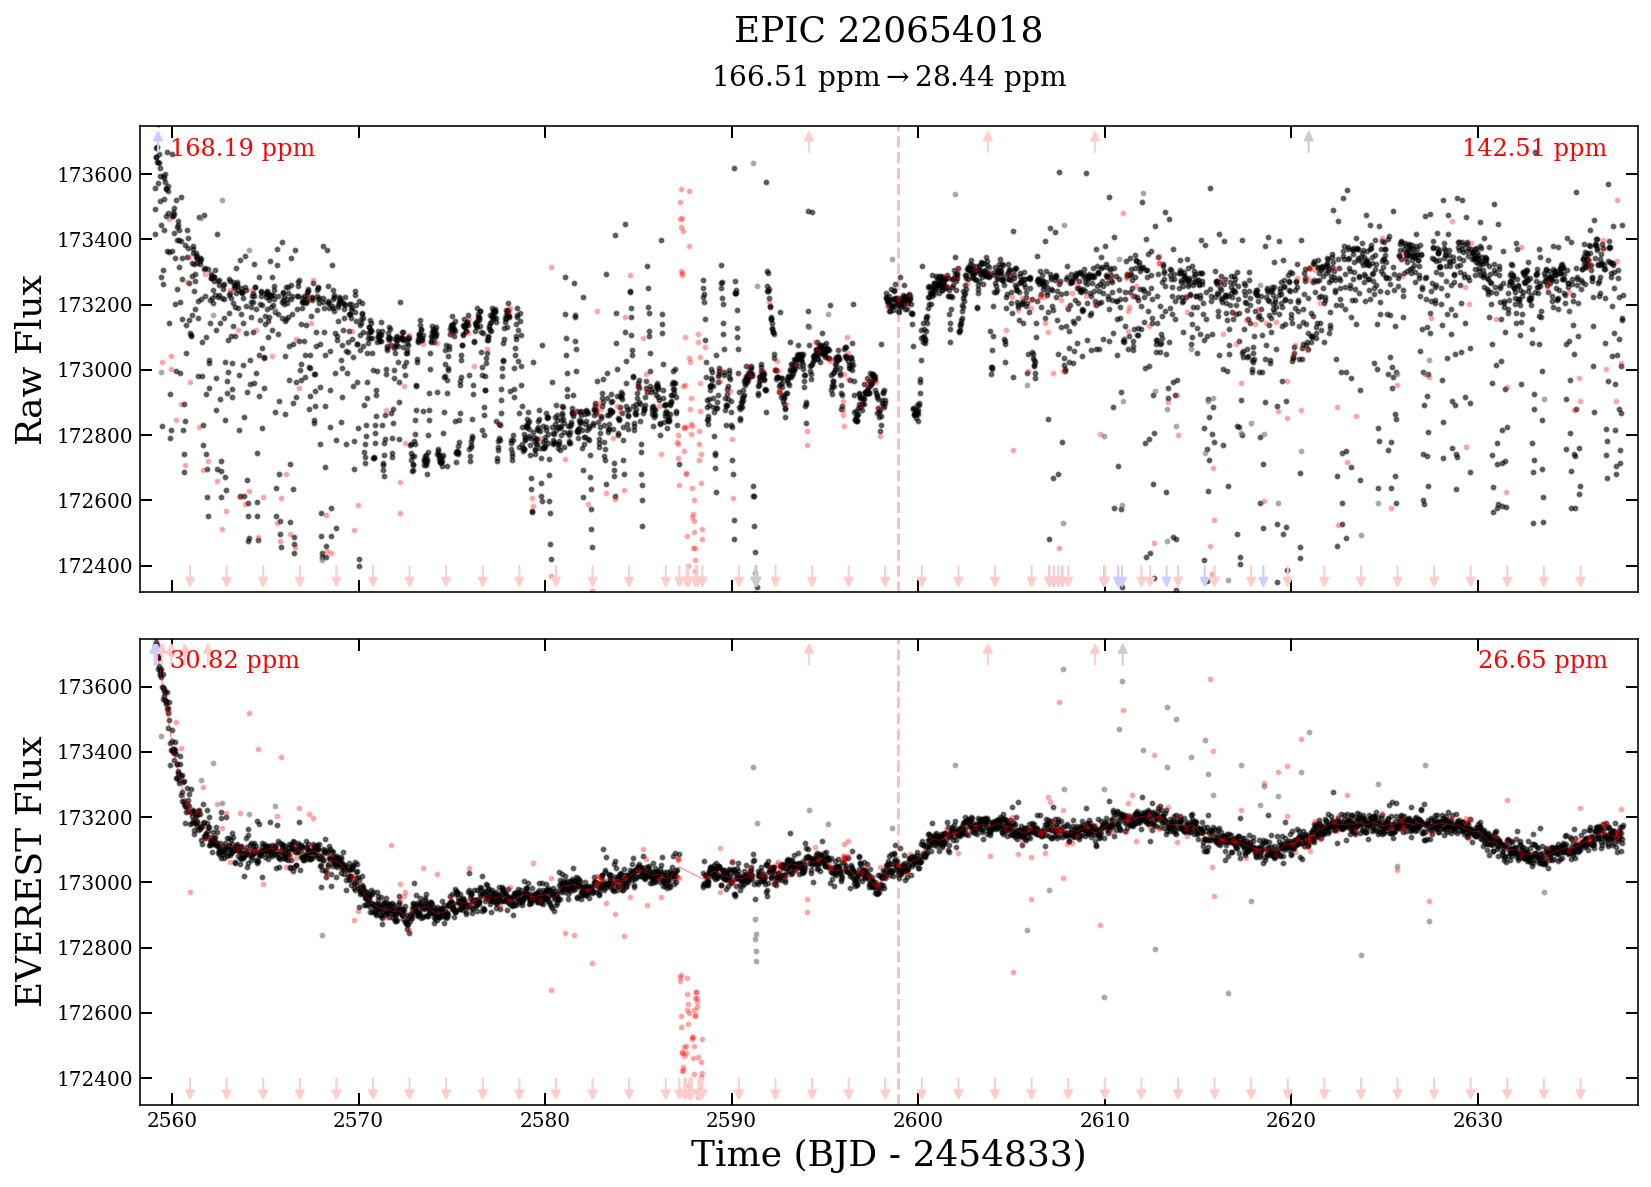

In [46]:
star.plot()

INFO  [everest.missions.k2.pipelines.get()]: Downloading everest1 light curve for 220654018...


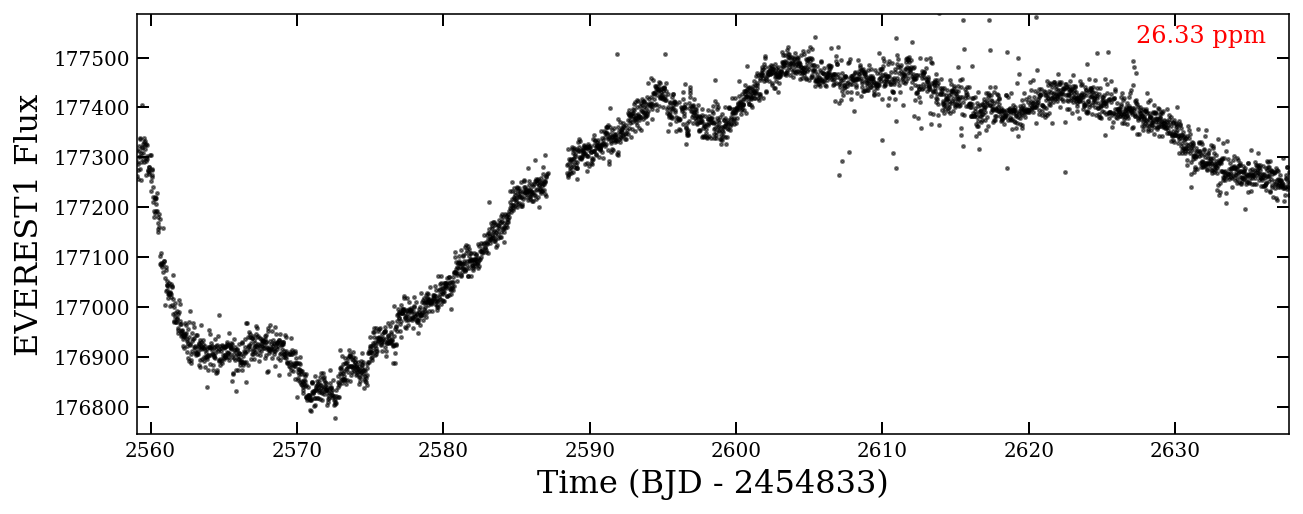

In [47]:
star.plot_pipeline('everest1')

INFO  [everest.missions.k2.pipelines.get()]: Downloading k2sff light curve for 220654018...


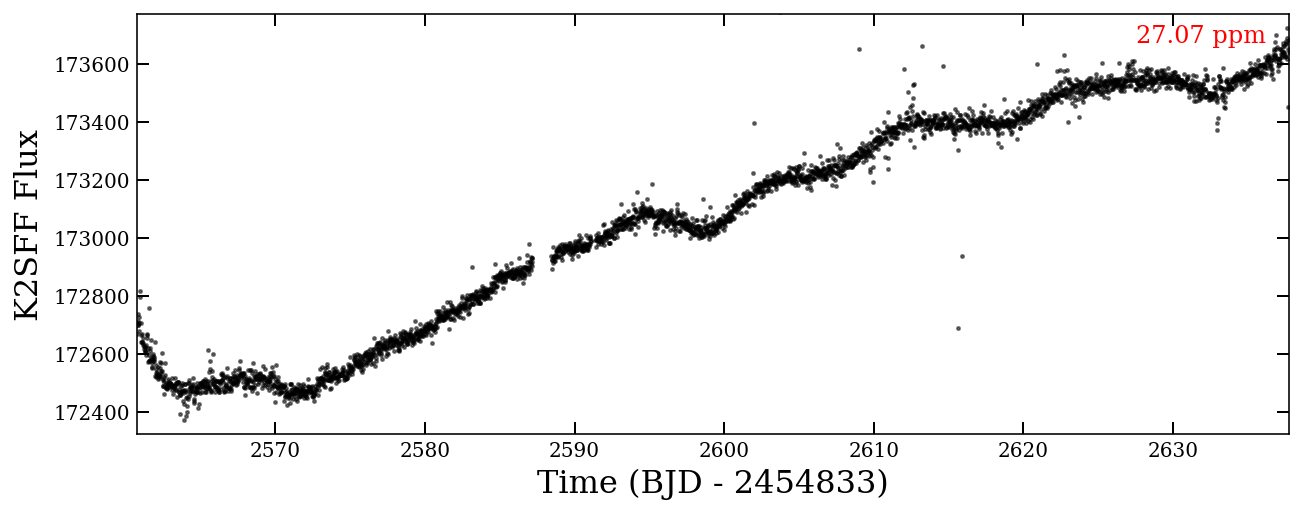

In [48]:
star.plot_pipeline('k2sff')

### Compare Kepler Pipeline's PDC to EVEREST's "Raw"

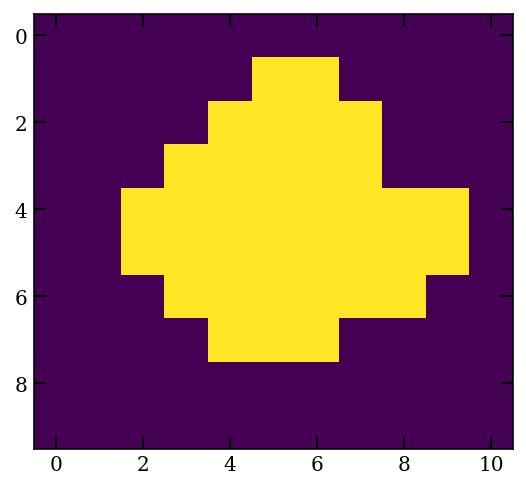

In [49]:
plt.imshow(star.aperture)

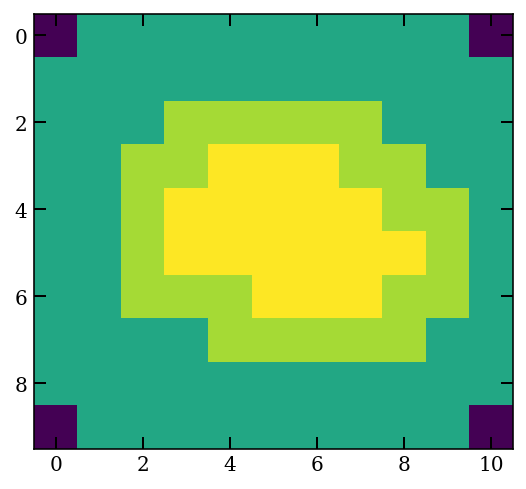

In [50]:
plt.imshow(hdu_ap.data)

In [51]:
star.aperture

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

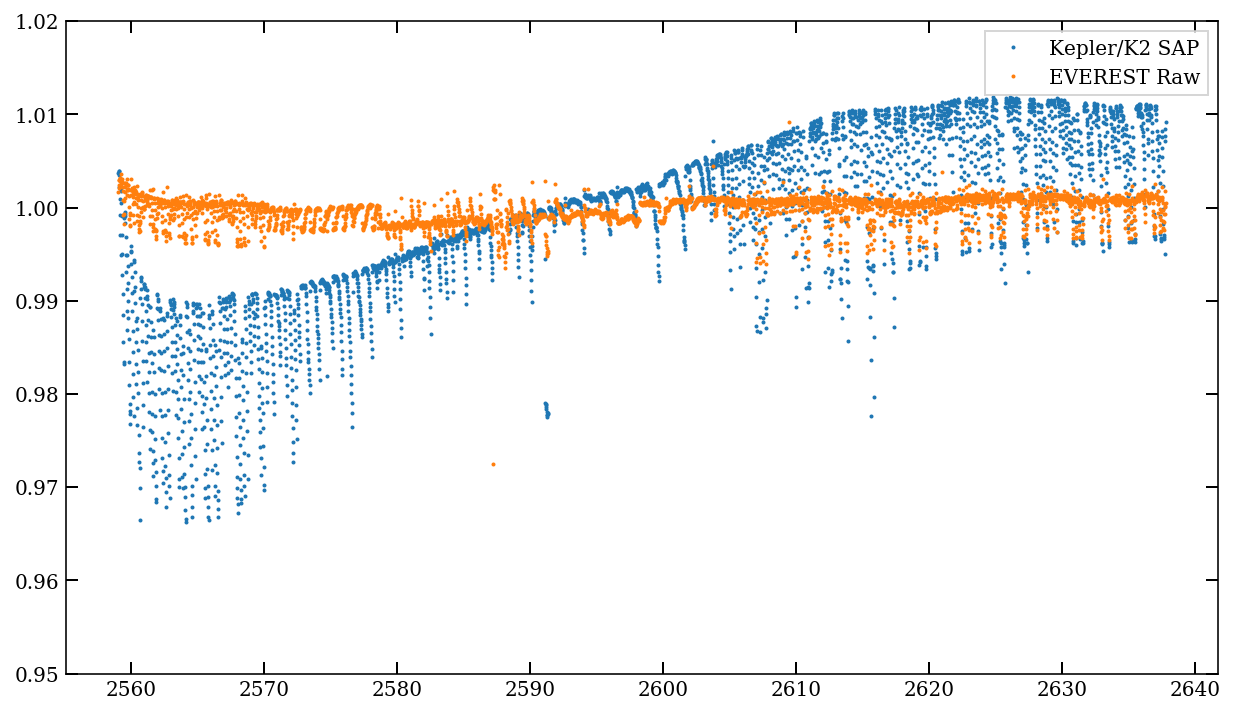

In [54]:
plt.figure(figsize=(10, 6))
#plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.', label = 'Kepler/K2 PDC', ms=2)
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', label = 'Kepler/K2 SAP', ms=2)
plt.plot(star.time, star.fraw/np.nanmedian(star.fraw), '.', label='EVEREST Raw', ms=2)
plt.ylim(0.95, 1.02)
#plt.xlim(2380, 2450)
plt.legend(loc='best');

In [55]:
datacube = dat2['FLUX']

In [56]:
ev_masked = datacube*star.aperture

In [57]:
ev_masked.shape

(3853, 10, 11)

In [58]:
manual_lc = np.nansum(datacube*star.aperture, axis=(1,2))

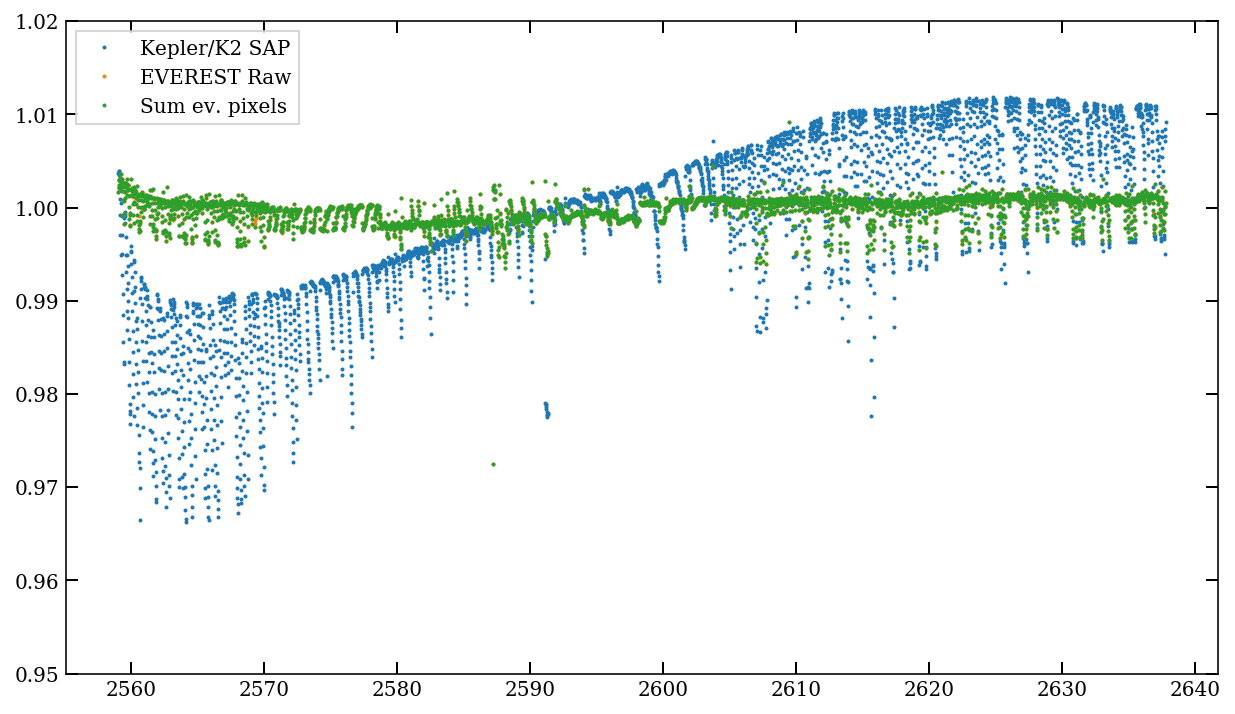

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', label = 'Kepler/K2 SAP', ms=2)
plt.plot(star.time, star.fraw/np.nanmedian(star.fraw), '.', label='EVEREST Raw', ms=2)
plt.plot(star.time, manual_lc/np.nanmedian(manual_lc), '.', label='Sum ev. pixels', ms=2)
plt.ylim(0.95, 1.02)
#plt.xlim(2380, 2450)
plt.legend(loc='best');

## Try to "freeze" the motion by samping on 6 hour timescales.

In [61]:
ev_masked.shape

(3853, 10, 11)

In [62]:
ev_masked[:-12:12,:,:].shape

(321, 10, 11)

In [63]:
ev_masked[12:-1:12,:,:].shape

(320, 10, 11)

In [64]:
diffed = ev_masked[:-12:12,:,:] - ev_masked[11::12,:,:]

What the sum along the time axis?

In [65]:
np.nanstd(diffed)

2802.051973569698

In [66]:
n_steps = 12

In [67]:
std_vec = np.zeros(n_steps)
for i in range(n_steps):
    std_vec[i] = np.nanstd(ev_masked[i:-n_steps+i:n_steps,:,:] - ev_masked[i+n_steps*80,:,:])

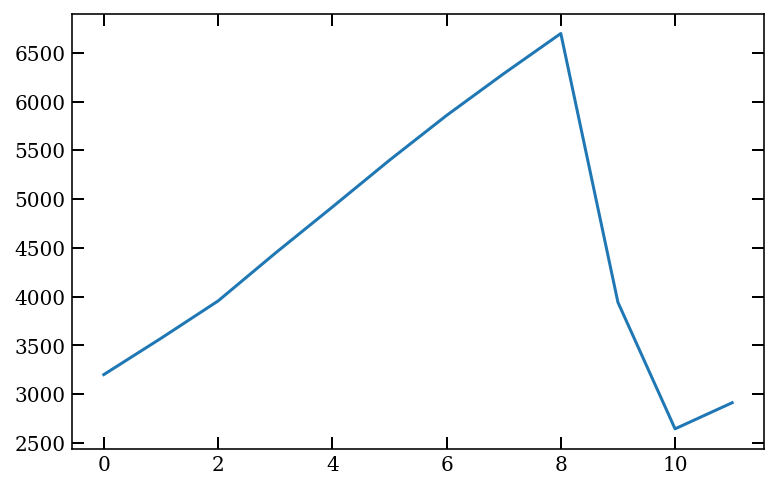

In [68]:
plt.plot(std_vec)

In [69]:
i = 10
n_steps = 12
template = 4
diffed = ev_masked[i:-n_steps+i:n_steps,:,:] - ev_masked[i+n_steps*template,:,:]

In [76]:
def pltdif(f):
    plt.plot(star.time[::12], manual_lc[::12]/np.nanmedian(manual_lc[::12]), '.', label='Sum ev. pixels', ms=4)
    plt.plot(star.time, manual_lc/np.nanmedian(manual_lc), '.', label='Sum ev. pixels', ms=1, alpha=0.3)
    plt.ylim(0.99, 1.005)
    #plt.xlim(2385, 2440)
    plt.axvline(star.time[0+f*12])
    plt.show()
    plt.imshow(diffed[f, :,:],vmin=0,vmax=70)
    plt.colorbar
    plt.minorticks_on()
    plt.show()

In [77]:
interact(pltdif, f=(0,321,1));

interactive(children=(IntSlider(value=160, description='f', max=321), Output()), _dom_classes=('widget-interact',))

## Look at the localised light-curve

In [92]:
manual_lc = np.nansum(datacube*star.aperture, axis=(1,2))

In [93]:
datacube.shape

(3863, 8, 7)

In [99]:
SNisolate = datacube[:,2:4,1:4]

In [100]:
SNisolate.shape

(3863, 2, 3)

In [96]:
SNflux=np.nansum(SNisolate, axis=(1))

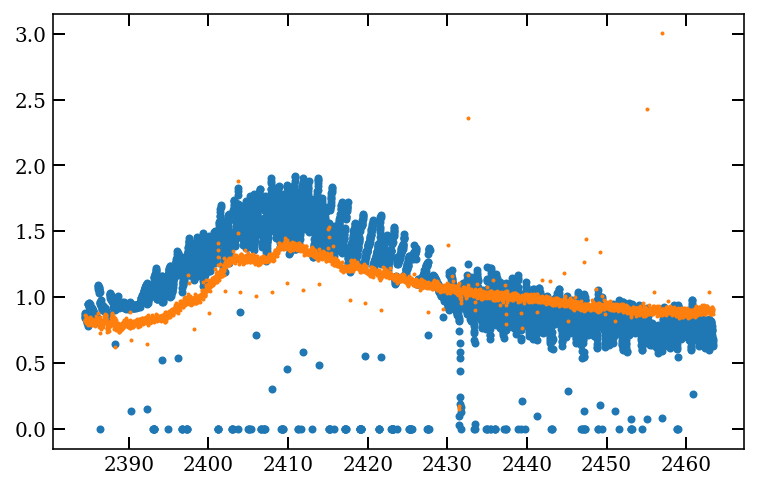

In [97]:
plt.plot(star.time, SNflux/np.nanmedian(SNflux),'.')
plt.plot(star.time, star.fraw/np.nanmedian(star.fraw), '.', label='EVEREST Raw', ms=2)

In [52]:
diffed.shape

(321, 8, 8)

In [70]:
star.dvs()

INFO  [everest.user.DownloadFile()]: Found cached file.


Neat!

<!--NAVIGATION-->
< [Spot-check Everest Validation Summaries for KEGS](01.06-Everest_KEGS_DVS.ipynb) | [Contents](Index.ipynb) | [Supernova Searches](02.00-Supernova_searches.ipynb) >